In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
diabetes = datasets.load_diabetes()

In [35]:
diabetes_X = diabetes.data[:, 2, np.newaxis]

In [41]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [37]:
model = LinearRegression()

In [56]:
model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
pred_train = model.predict(diabetes_X_train)
pred_test = model.predict(diabetes_X_test)

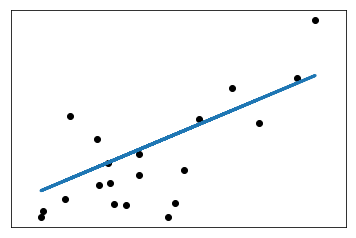

In [65]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, pred_test, linewidth=3)
plt.xticks([])
plt.yticks([])
plt.show()

In [66]:
from sklearn.linear_model import Ridge, Lasso

In [80]:
diabetes_X = diabetes.data
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [72]:
model = Ridge()
model.fit(diabetes_X_train, diabetes_y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [96]:
y_train_pred = model.predict(diabetes_X_train)
y_test_pred = model.predict(diabetes_X_test)

In [124]:
alphas = np.logspace(-10, 3, 200)

In [129]:
coefs = []
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(diabetes_X, diabetes.target)
    y_test_pred = model.predict(diabetes_X_test)
    print(r2_score(diabetes_y_test, y_test_pred))
    coefs.append(model.coef_)

0.5964497866828713
0.5964497866886618
0.5964497866953924
0.5964497867032155
0.5964497867123082
0.5964497867228772
0.5964497867351617
0.59644978674944
0.5964497867660363
0.5964497867853261
0.5964497868077474
0.5964497868338083
0.5964497868640994
0.596449786899307
0.5964497869402299
0.5964497869877957
0.5964497870430823
0.5964497871073431
0.596449787182035
0.5964497872688509
0.5964497873697593
0.5964497874870469
0.5964497876233732
0.5964497877818282
0.5964497879660043
0.5964497881800759
0.596449788428896
0.5964497887181053
0.5964497890542593
0.5964497894449786
0.5964497898991203
0.596449790426979
0.5964497910405204
0.5964497917536529
0.5964497925825419
0.5964497935459769
0.5964497946657976
0.5964497959673885
0.5964497974802534
0.5964497992386864
0.5964498012825474
0.5964498036581658
0.596449806419391
0.5964498096288113
0.5964498133591758
0.5964498176950378
0.5964498227346756
0.5964498285923162
0.5964498354007246
0.5964498433142109
0.5964498525121267
0.5964498632029256
0.5964498756288847


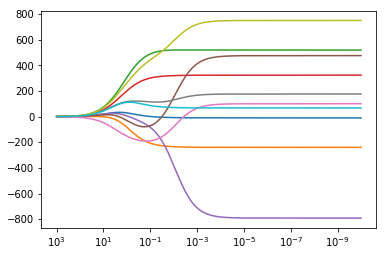

In [126]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

0.44250075713127157